# **RL Home-Work 1**

In [4]:
# numpy for Guassian Distribution Functions
# matplotlib to plot Graphs
# random for Random Integer Value Generation
import math
import numpy as np
import matplotlib.pyplot as plt
import random

## **Q1**

In [ ]:
# Function to compute Average Reward over 2000 independent runs of a '10' armed bandit problem for a fixed value of epsilon.
def e_greedy(epsilon,var):
  sum_rt=[0]*1000
  sum_error=[0]*1000
  opt_act=[0]*1000
  for j in range(2000):  
    q_star=[]                                                                                 # Store the True values of 10 arms drawn form a Standard Normal Guassian Distribution.
    for i1 in range(10):
      q_star.append(np.random.normal(0,1))
    Q_t=[0]*10                                                                                # Initialization
    optimal_arm=np.argmax(q_star)
    times_picked=[0]*10
    for i in range(1000):
      prob=random.random()
      if prob <= epsilon :                                                                    # Exploration
        ind=random.randint(0,9)    
      else:                                                                                   # Exploitation
        ind=np.argmax(Q_t)
      times_picked[ind]+=1
      r_t=np.random.normal(q_star[ind],var)
      sum_error[i]+=abs(r_t-Q_t[ind])
      Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(r_t/times_picked[ind])
      sum_rt[i]+=r_t
      if ind == optimal_arm:
        opt_act[i]+=1
  for k in range(1000):
    sum_rt[k]=sum_rt[k]/2000
    sum_error[k]=sum_error[k]/2000
    opt_act[k]=opt_act[k]/20
  return sum_rt,opt_act,sum_error 

In [ ]:
# Average Values of Rewards, Optimal Action, Absolute Error for epsilon = 0.1, 0.01, 0
eps_0pnt1,opt_0pnt1,err_0pnt1=e_greedy(0.1,1)
eps_0pnt01,opt_0pnt01,err_0pnt01=e_greedy(0.01,1)
eps_0,opt_0,err_0=e_greedy(0,1)
eps_0pnt1_ucb=eps_0pnt1.copy()

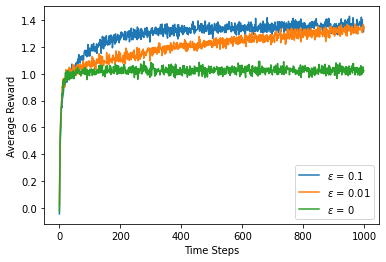

In [ ]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(eps_0pnt1)
plt.plot(eps_0pnt01)
plt.plot(eps_0)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

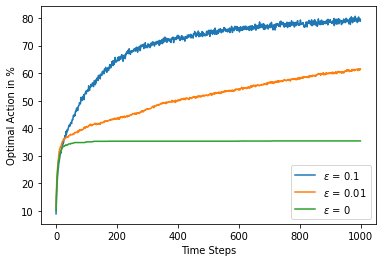

In [ ]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(opt_0pnt1)
plt.plot(opt_0pnt01)
plt.plot(opt_0)
plt.ylabel("Optimal Action in %")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

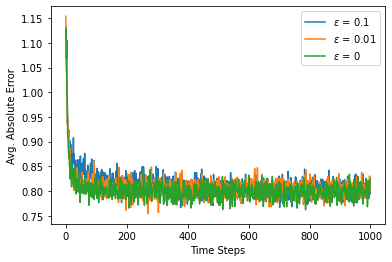

In [ ]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(err_0pnt1)
plt.plot(err_0pnt01)
plt.plot(err_0)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

In [ ]:
# Average Reward over 2000 independent runs of a '10' armed bandit problem for epsilon that varies over time i.e. epsilon = 1/t
def e_greedy_t(var):
  eps_t=[0]*1000
  opt_t=[0]*1000
  err_t=[0]*1000
  for j in range(2000):  
    q_star=[]                                                                                     # Store the True values of 10 arms drawn form a Standard Normal Guassian Distribution.                                                                            
    for i1 in range(10):  
      q_star.append(np.random.normal(0,1))
    Q_t=[0]*10                                                                                    # Initialization
    optimal_arm=np.argmax(q_star)
    times_picked=[0]*10
    for i in range(1,1001):
      epsilon = 1/i
      prob=random.random()
      if prob <= epsilon :                                                                        # Exploration
        ind=random.randint(0,9)    
      else:                                                                                       # Exploitation
        ind=np.argmax(Q_t)
      times_picked[ind]+=1
      r_t=np.random.normal(q_star[ind],var)
      err_t[i-1]+=abs(r_t-Q_t[ind])
      Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(r_t/times_picked[ind])
      eps_t[i-1]+=r_t
      if ind == optimal_arm:
          opt_t[i-1]+=1
  for k in range(1000):
    eps_t[k]=eps_t[k]/2000
    opt_t[k]=opt_t[k]/20
    err_t[k]=err_t[k]/2000
  return eps_t,err_t,opt_t


In [ ]:
# calling the Function
eps_t,err_t,opt_t = e_greedy_t(1)

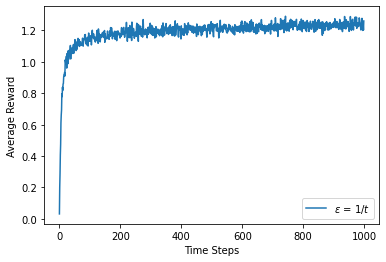

In [ ]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(eps_t)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

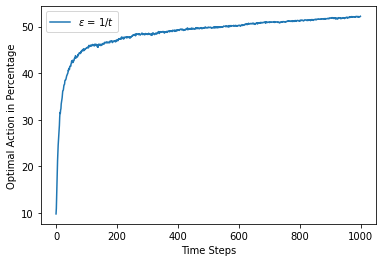

In [ ]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(opt_t)
plt.ylabel("Optimal Action in Percentage")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

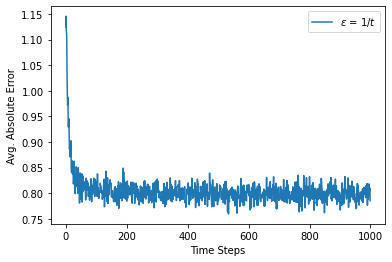

In [ ]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(err_t)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

Final Graphs

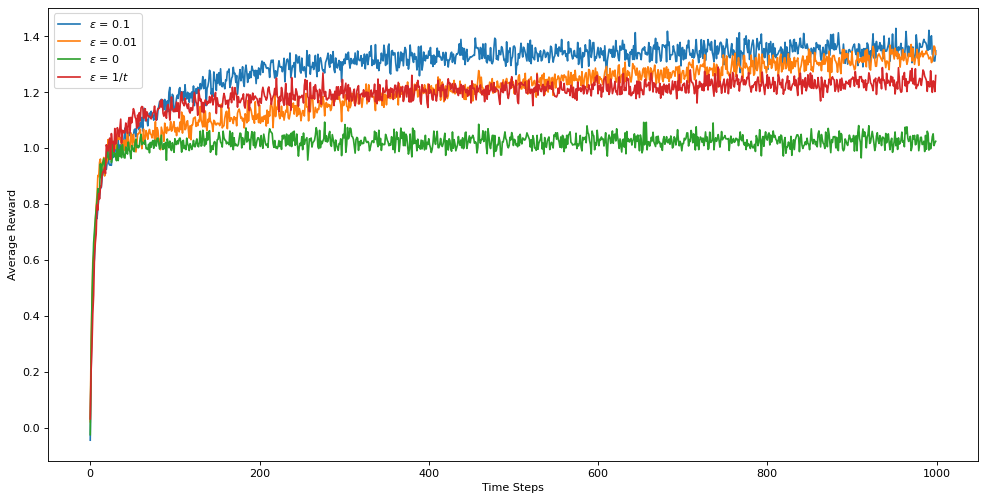

In [ ]:
# AVERAGE REWARD
plt.figure(num=None, figsize=(15,7.5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(eps_0pnt1)
plt.plot(eps_0pnt01)
plt.plot(eps_0)
plt.plot(eps_t)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0","$\epsilon$ = $1/t$"])
plt.show()

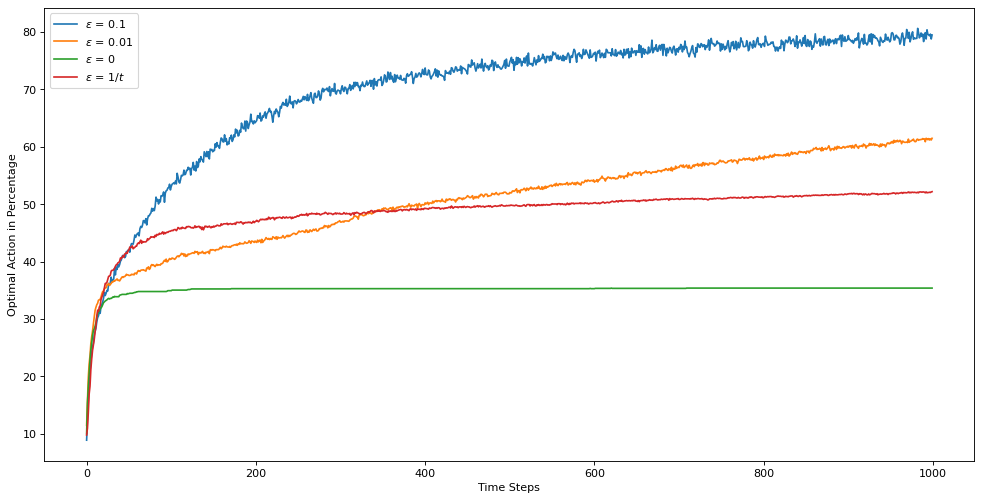

In [ ]:
# OPTIMAL ACTION
plt.figure(num=None, figsize=(15,7.5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(opt_0pnt1)
plt.plot(opt_0pnt01)
plt.plot(opt_0)
plt.plot(opt_t)
plt.ylabel("Optimal Action in Percentage")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0","$\epsilon$ = $1/t$"])
plt.show()

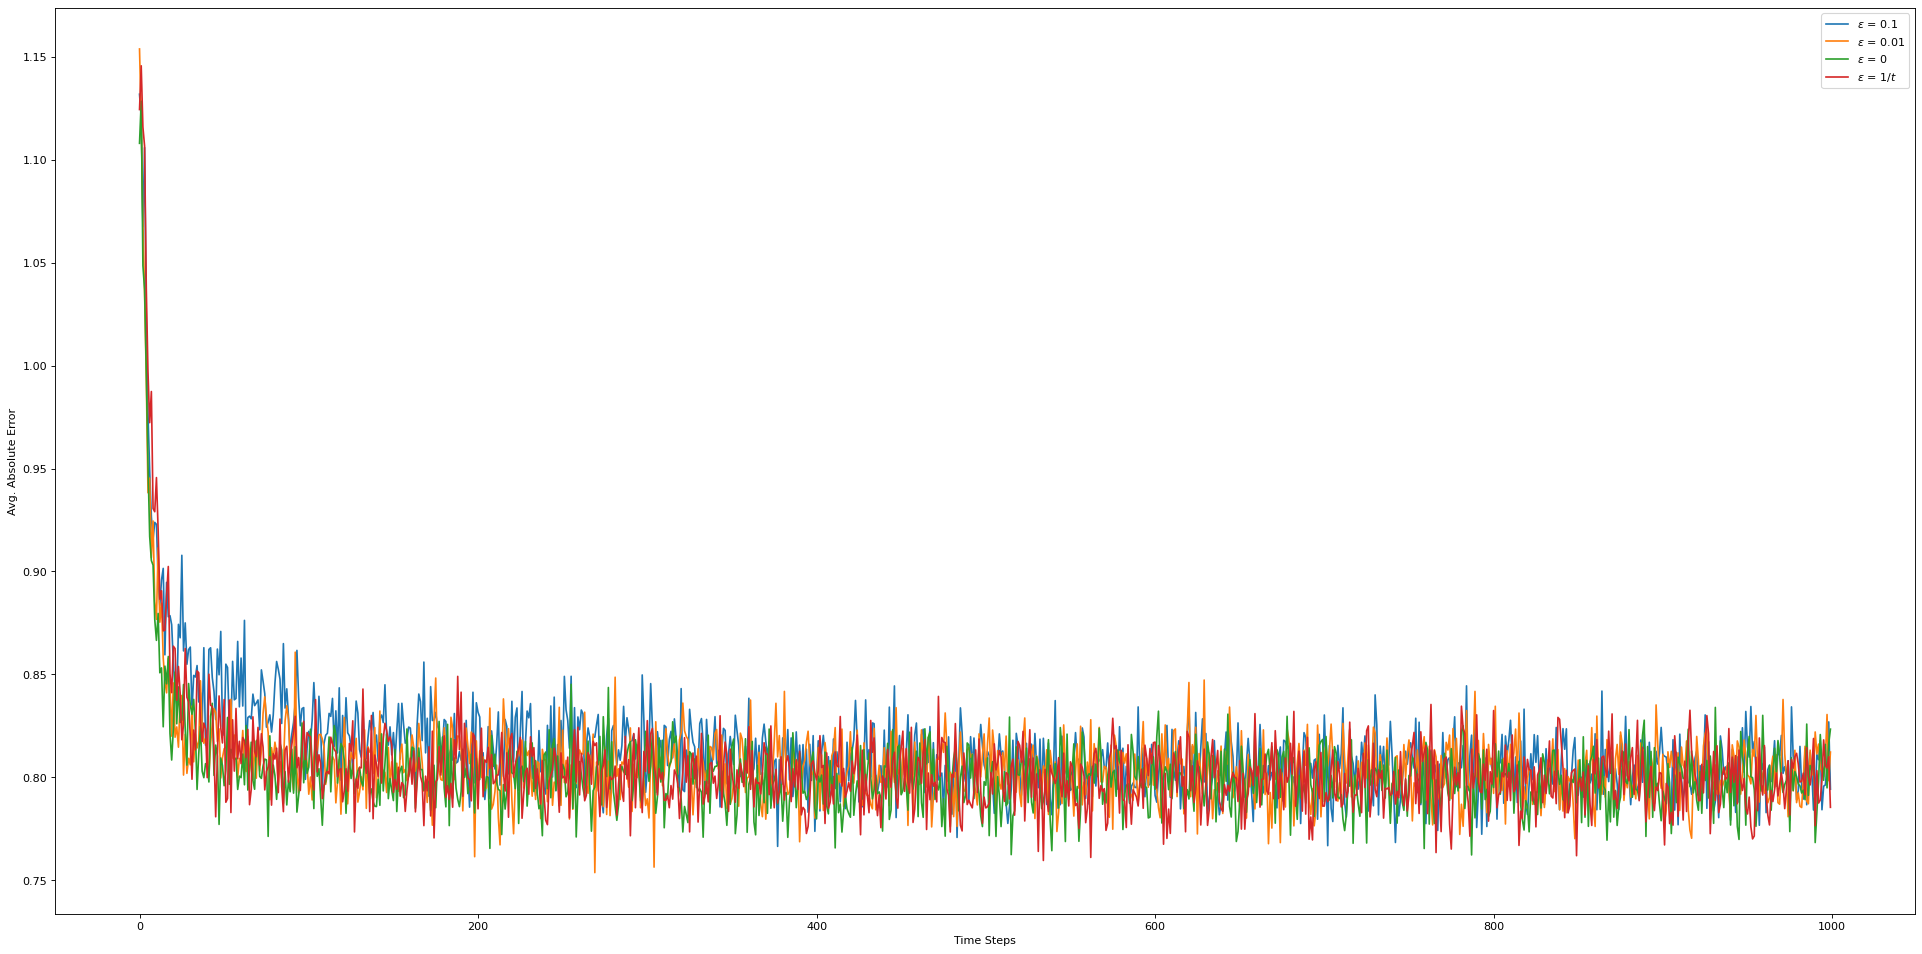

In [ ]:
# ABSOLUTE ERROR
plt.figure(num=None, figsize=(30,15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(err_0pnt1)
plt.plot(err_0pnt01)
plt.plot(err_0)
plt.plot(err_t)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0","$\epsilon$ = $1/t$"])
plt.show()

## **Q2**

In [ ]:
# Average Values of Rewards, Optimal Action, Absolute Error for epsilon = 0.1, 0.01, 0
eps_0pnt1,opt_0pnt1,err_0pnt1=e_greedy(0.1,2)
eps_0pnt01,opt_0pnt01,err_0pnt01=e_greedy(0.01,2)
eps_0,opt_0,err_0=e_greedy(0,2)

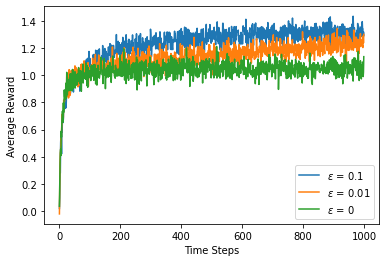

In [ ]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(eps_0pnt1)
plt.plot(eps_0pnt01)
plt.plot(eps_0)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

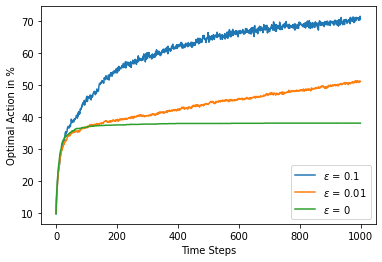

In [ ]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(opt_0pnt1)
plt.plot(opt_0pnt01)
plt.plot(opt_0)
plt.ylabel("Optimal Action in %")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

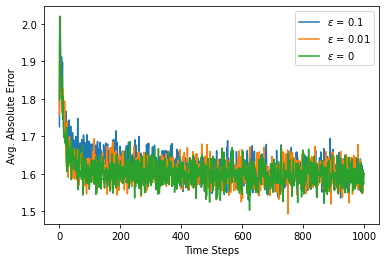

In [ ]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(err_0pnt1)
plt.plot(err_0pnt01)
plt.plot(err_0)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

In [ ]:
# calling the Function
eps_t,err_t,opt_t = e_greedy_t(2)

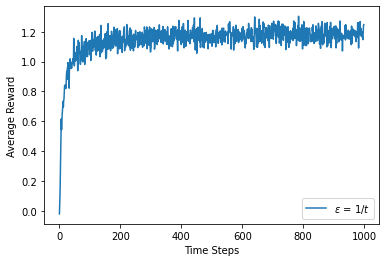

In [ ]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(eps_t)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

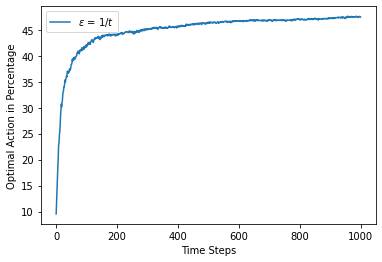

In [ ]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(opt_t)
plt.ylabel("Optimal Action in Percentage")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

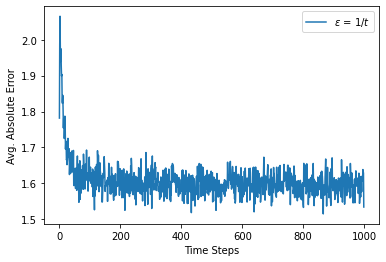

In [ ]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(err_t)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

Final Graphs


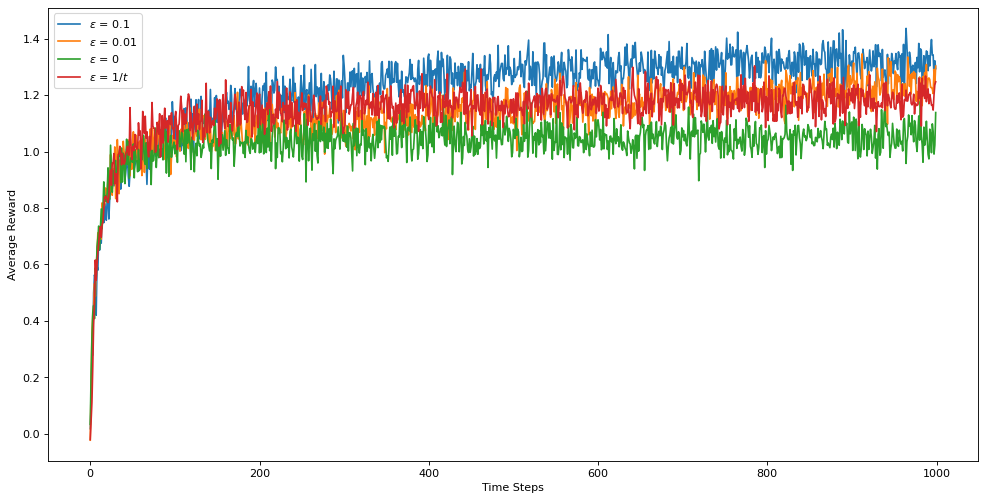

In [ ]:
# AVERAGE REWARD
plt.figure(num=None, figsize=(15,7.5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(eps_0pnt1)
plt.plot(eps_0pnt01)
plt.plot(eps_0)
plt.plot(eps_t)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0","$\epsilon$ = $1/t$"])
plt.show()

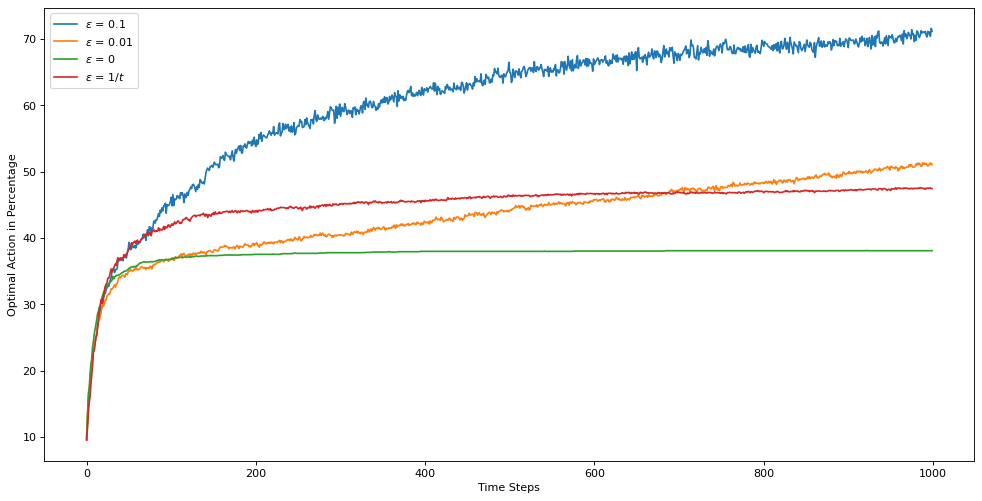

In [ ]:
# OPTIMAL ACTION
plt.figure(num=None, figsize=(15,7.5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(opt_0pnt1)
plt.plot(opt_0pnt01)
plt.plot(opt_0)
plt.plot(opt_t)
plt.ylabel("Optimal Action in Percentage")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0","$\epsilon$ = $1/t$"])
plt.show()

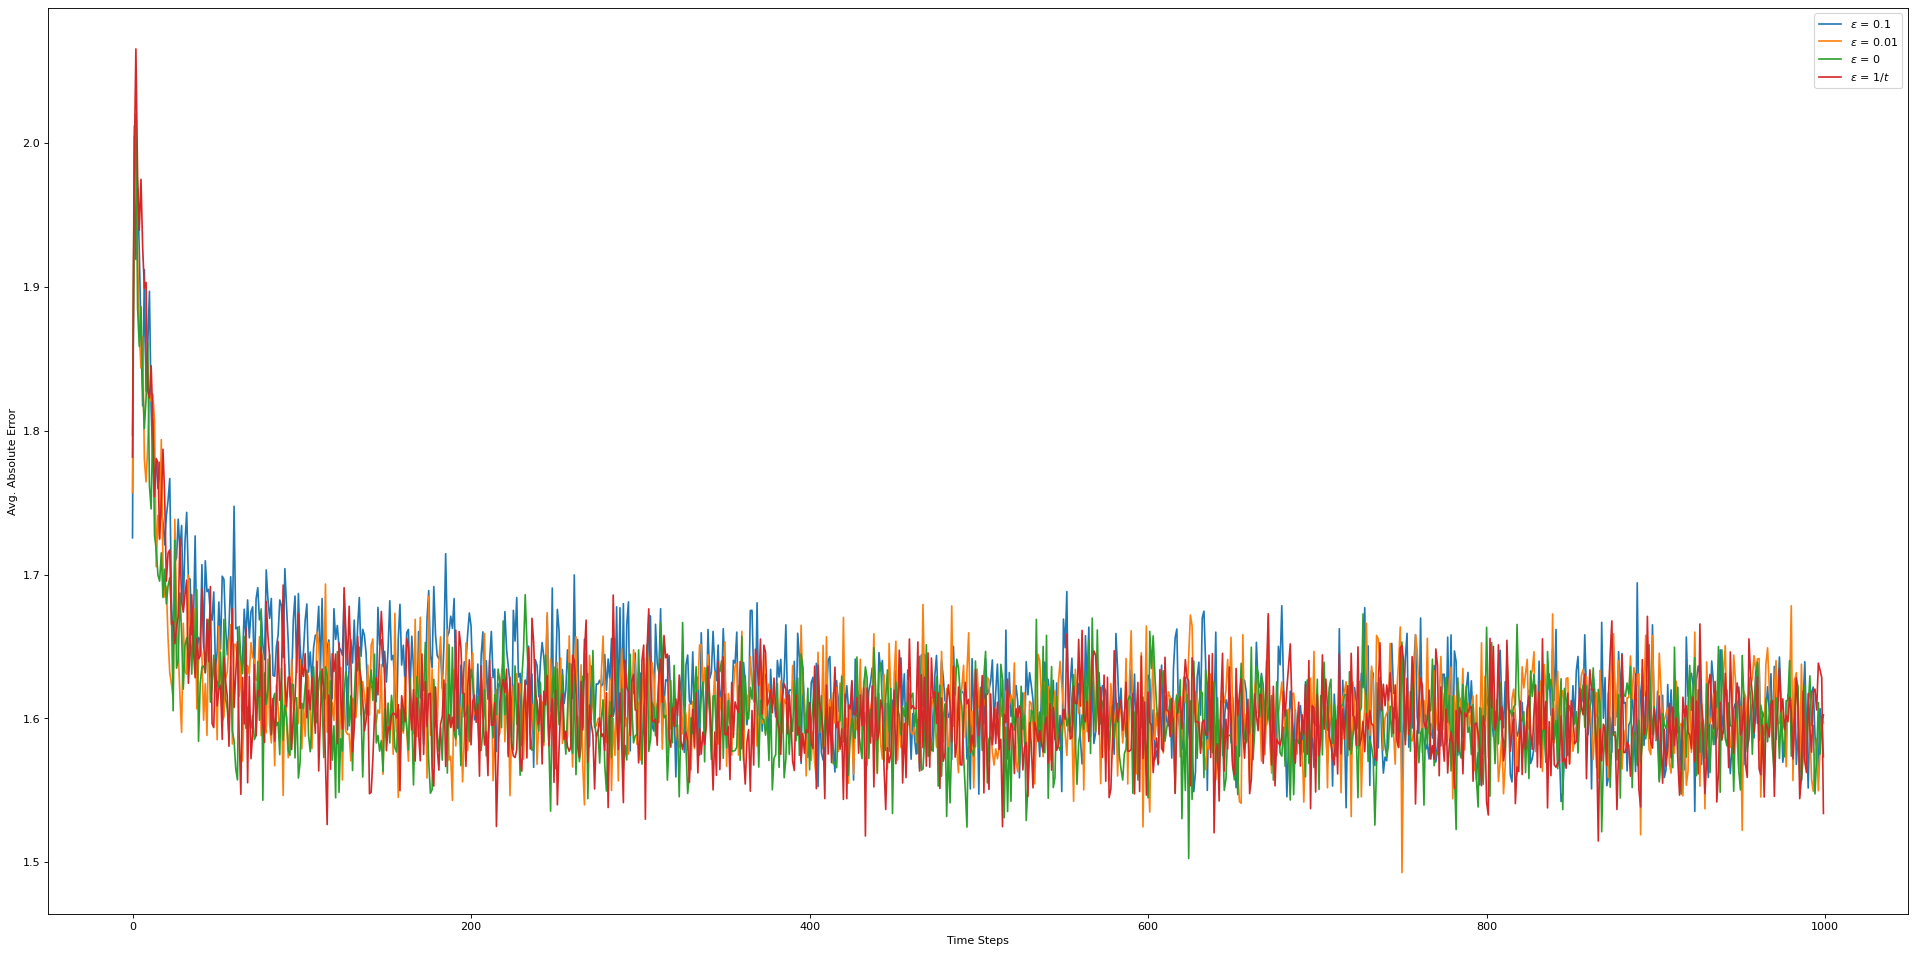

In [ ]:
# ABSOLUTE ERROR
plt.figure(num=None, figsize=(30,15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(err_0pnt1)
plt.plot(err_0pnt01)
plt.plot(err_0)
plt.plot(err_t)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0","$\epsilon$ = $1/t$"])
plt.show()

## **Q5**

In [ ]:
# Function to compute Average Reward over 2000 independent runs of a '10' armed bandit problem for a fixed value of epsilon.
def e_greedy(epsilon,var):
  sum_rt=[0]*10000
  opt_act=[0]*10000
  for j in range(2000):  
    q_star=[0]*10                                                                             # Store the True values of 10 arms drawn form a Standard Normal Guassian Distribution.
    Q_t=[0]*10                                                                                # Initialization
    times_picked=[0]*10
    for i in range(10000):
      for i1 in range(10):
        if i != 0:
          increment = np.random.normal(0,0.01)
          q_star[i1]+=increment
      optimal_arm=np.argmax(q_star)
      prob=random.random()
      if prob <= epsilon :                                                                    # Exploration
        ind=random.randint(0,9)    
      else:                                                                                   # Exploitation
        ind=np.argmax(Q_t)
      times_picked[ind]+=1
      r_t=np.random.normal(q_star[ind],var)
      Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(r_t/times_picked[ind])
      sum_rt[i]+=r_t
      if ind == optimal_arm:
        opt_act[i]+=1
  for k in range(10000):
    sum_rt[k]=sum_rt[k]/2000
    opt_act[k]=opt_act[k]/20
  return sum_rt,opt_act 

In [ ]:
# Average Values of Rewards, Optimal Action, Absolute Error for epsilon = 0.1, 0.01, 0
eps_0pnt1,opt_0pnt1=e_greedy(0.1,1)

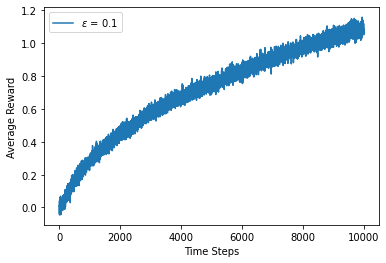

In [ ]:
# plotting the Graph for fixed values of Epsilon
plt.plot(eps_0pnt1)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1"])
plt.show()

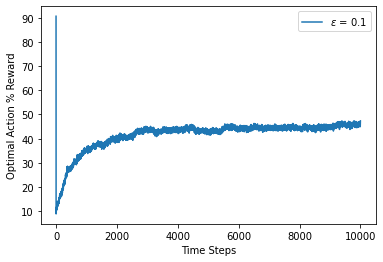

In [ ]:
# plotting the Graph for fixed values of Epsilon
plt.plot(opt_0pnt1)
plt.ylabel("Optimal Action % Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1"])
plt.show()

In [ ]:
# Function to compute Average Reward over 2000 independent runs of a '10' armed bandit problem for a fixed value of epsilon.
def e_greedy_alpha(epsilon,var):
  sum_rt_alpha=[0]*10000
  opt_act_alpha=[0]*10000
  for j in range(2000):  
    q_star=[0]*10                                                                             # Store the True values of 10 arms drawn form a Standard Normal Guassian Distribution.
    Q_t=[0]*10                                                                                # Initialization
    times_picked=[0]*10
    for i in range(10000):
      for i1 in range(10):
        if i != 0:
          increment = np.random.normal(0,0.01) 
          q_star[i1]+=increment
      optimal_arm=np.argmax(q_star)
      prob=random.random()
      if prob <= epsilon :                                                                    # Exploration
        ind=random.randint(0,9)    
      else:                                                                                   # Exploitation
        ind=np.argmax(Q_t)
      times_picked[ind]+=1
      r_t=np.random.normal(q_star[ind],var)
      Q_t[ind]=Q_t[ind]+(0.1)*(r_t-Q_t[ind])
      sum_rt_alpha[i]+=r_t
      if ind == optimal_arm:
        opt_act_alpha[i]+=1
  for k in range(10000):
    sum_rt_alpha[k]=sum_rt_alpha[k]/2000
    opt_act_alpha[k]=opt_act_alpha[k]/20
  return sum_rt_alpha,opt_act_alpha 

In [ ]:
# Average Values of Rewards, Optimal Action, Absolute Error for epsilon = 0.1, 0.01, 0
sum_rt_alpha,opt_act_alpha = e_greedy_alpha(0.1,1)

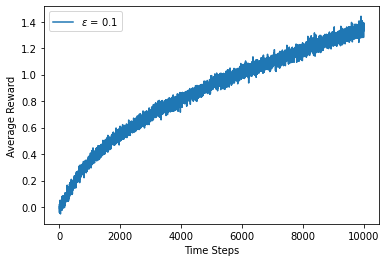

In [ ]:
# plotting the Graph for fixed values of Epsilon
plt.plot(sum_rt_alpha)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1"])
plt.show()

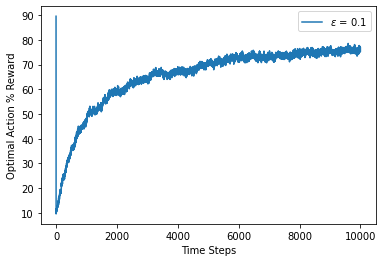

In [ ]:
# plotting the Graph for fixed values of Epsilon
plt.plot(opt_act_alpha)
plt.ylabel("Optimal Action % Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1"])
plt.show()

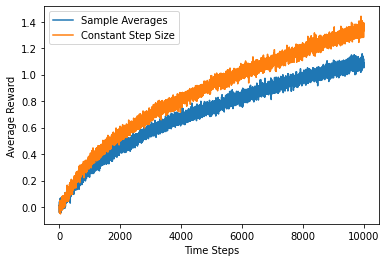

In [ ]:
# plotting the Graph for fixed values of Epsilon
plt.plot(eps_0pnt1)
plt.plot(sum_rt_alpha)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["Sample Averages","Constant Step Size"])
plt.show()

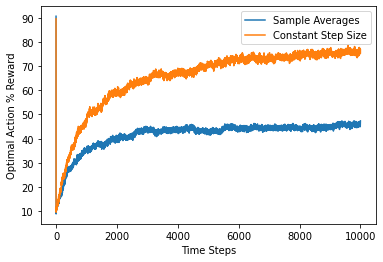

In [ ]:
# plotting the Graph for fixed values of Epsilon
plt.plot(opt_0pnt1)
plt.plot(opt_act_alpha)
plt.ylabel("Optimal Action % Reward")
plt.xlabel("Time Steps")
plt.legend(["Sample Averages","Constant Step Size"])
plt.show()

## **Q6**

In [ ]:
# Function to compute Average Reward over 2000 independent runs of a '10' armed bandit problem for a fixed value of epsilon.
def ucb(var,c):
  sum_rt=[0]*1000
  for j in range(2000):  
    q_star=[]                                                                                 # Store the True values of 10 arms drawn form a Standard Normal Guassian Distribution.
    for i1 in range(10):
      q_star.append(np.random.normal(0,1))
    Q_t=[0]*10                                                                                # Initialization
    optimal_arm=np.argmax(q_star)
    times_picked=[0]*10
    for i in range(1000):
        flag=0
        arr =[0]*10
        for p in range(10):
          if (times_picked[p]==0):
            flag=1
            ind=p
            break
          else:
            arr[p]=Q_t[p]+ c*math.sqrt(math.log(i+1)/times_picked[p])
        if(flag==0):
          ind=np.argmax(arr)                                                                # Exploration      
        times_picked[ind]+=1
        r_t=np.random.normal(q_star[ind],var)
        Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(r_t/times_picked[ind])
        sum_rt[i]+=r_t
  for k in range(1000):
    sum_rt[k]=sum_rt[k]/2000
  return sum_rt

In [ ]:
ucb_1 = ucb(1,1)
ucb_2 = ucb(1,2)
ucb_4 = ucb(1,4)

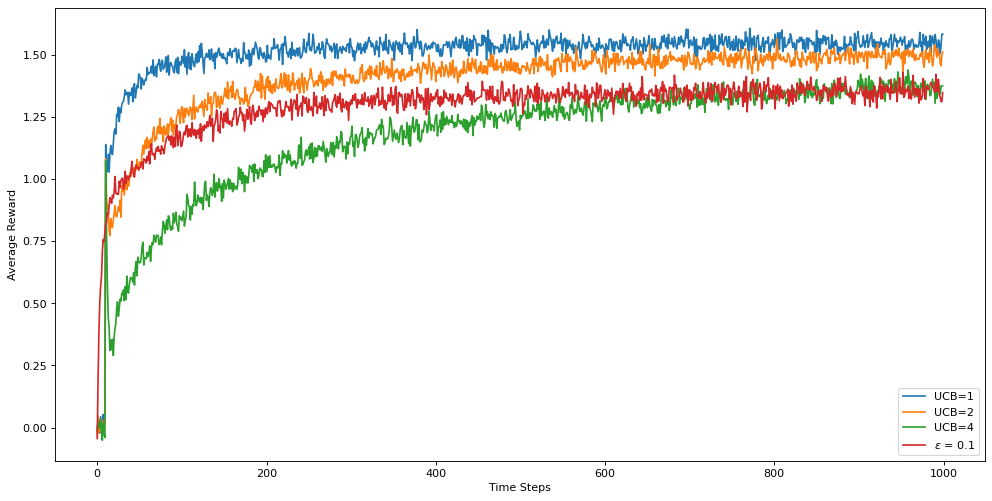

In [ ]:
# plotting the Graph for '3' fixed values of Epsilon
plt.figure(num=None, figsize=(15,7.5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ucb_1)
plt.plot(ucb_2)
plt.plot(ucb_4)
plt.plot(eps_0pnt1_ucb)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["UCB=1","UCB=2","UCB=4","$\epsilon$ = 0.1"])
plt.show()

### Q7

In [5]:
def pi_t_calc(h_t,a):
  numr = math.exp(h_t[a])
  denr = 0
  for i in range(len(h_t)):
    denr = denr + math.exp(h_t[i])
  return numr/denr


In [6]:
def grad_bandit(alpha):
  indi = [0,1,2,3,4,5,6,7,8,9]
  opt_act = [0] * 1000
  for runs in range(2000):
    h_t = [0]*10
    r_bar_t = 0
    q_star=[]
    for i1 in range(10):
      q_star.append(np.random.normal(4,1))
    act_opt = np.argmax(q_star)
    for ts in range(1000):
      pi_t = [pi_t_calc(h_t,a) for a in indi]
      ind = (random.choices(indi, weights=pi_t, k=1))[0]
      if act_opt == ind :
        opt_act[ts] += 1 
      r_t = np.random.normal(q_star[ind],1)
      if (ts==0):
        r_bar_t = r_t
      h_t[ind] = h_t[ind] + alpha * (r_t - r_bar_t)*(1-pi_t[ind])
      for arm in range(10):
        if arm != ind:
          h_t[arm] = h_t[arm] - alpha * (r_t - r_bar_t)*(pi_t[arm])
      r_bar_t = (ts)*(r_bar_t/(ts+1))+(r_t/(ts+1))
  for p in range(1000):
    opt_act[p] = opt_act[p]/20
  return opt_act

In [7]:
opt_with_baseline_0_pnt_1 = grad_bandit(0.1)
opt_with_baseline_0_pnt_4 = grad_bandit(0.4)

In [10]:
def grad_bandit_without_baseline(alpha):
  indi = [0,1,2,3,4,5,6,7,8,9]
  opt_act = [0] * 1000
  for runs in range(2000):
    h_t = [0]*10
    r_bar_t = 0
    q_star=[]
    for i1 in range(10):
      q_star.append(np.random.normal(4,1))
    act_opt = np.argmax(q_star)
    for ts in range(1000):
      pi_t = [pi_t_calc(h_t,a) for a in indi]
      ind = (random.choices(indi, weights=pi_t, k=1))[0]
      if act_opt == ind :
        opt_act[ts] += 1 
      r_t = np.random.normal(q_star[ind],1)
      h_t[ind] = h_t[ind] + alpha * (r_t - r_bar_t)*(1-pi_t[ind])
      for arm in range(10):
        if arm != ind:
          h_t[arm] = h_t[arm] - alpha * (r_t - r_bar_t)*(pi_t[arm])
  for p in range(1000):
    opt_act[p] = opt_act[p]/20
  return opt_act

In [11]:
opt_without_baseline_0_pnt_1 = grad_bandit_without_baseline(0.1)
opt_without_baseline_0_pnt_4 = grad_bandit_without_baseline(0.4)

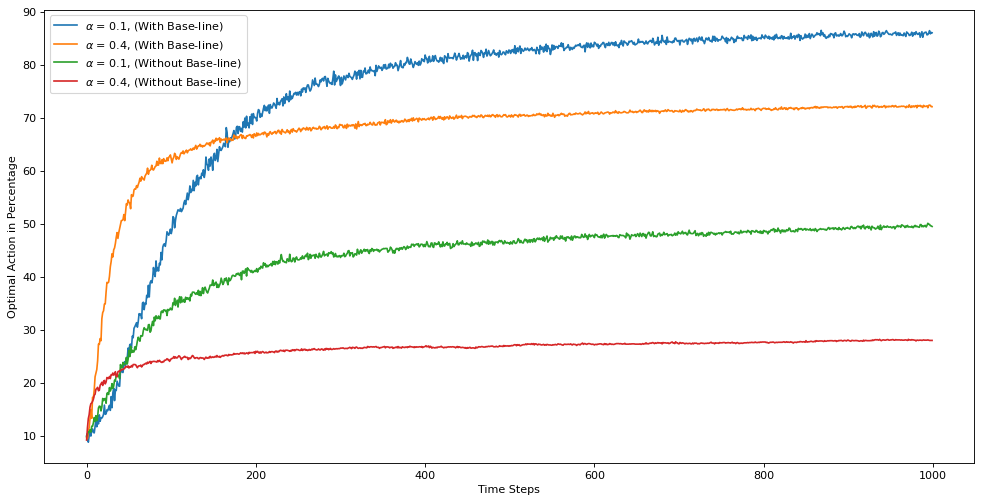

In [12]:
# OPTIMAL ACTION
plt.figure(num=None, figsize=(15,7.5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(opt_with_baseline_0_pnt_1)
plt.plot(opt_with_baseline_0_pnt_4)
plt.plot(opt_without_baseline_0_pnt_1)
plt.plot(opt_without_baseline_0_pnt_4)
plt.ylabel("Optimal Action in Percentage")
plt.xlabel("Time Steps")
plt.legend(["$\u03B1	$ = 0.1, (With Base-line)","$\u03B1	$ = 0.4, (With Base-line)","$\u03B1	$ = 0.1, (Without Base-line)","$\u03B1	$ = 0.4, (Without Base-line)"])
plt.show()